# Unsupervised learning
[(slides)](https://docs.google.com/presentation/d/1JJ3korka1rVc56szB7k6VH1sJ81B9pQgPE_XBakgeRI/edit?usp=sharing)

<p align="center">
  <img src="https://pbs.twimg.com/media/DsCTvc3XQAE7Njb?format=jpg&name=4096x4096" width="75%">
<p>

Unsupervised learning tries to find patterns within the data without pre-assigned labels.
For example, apples and bananas are fruits but, they are clearly different regarding their color and shape. Therefore, unsupervised learning is known as _learning without a teacher_.

Unsupervised learning can be classified into two categories:
- **Parametric Unsupervised Learning**. It assumes that sample data comes from a population that follows a probability distribution based on a fixed set of parameters. One example of this are *Gaussian Mixture Models* (<a href='#section4'>section 4</a>), which assume all the data points are generated from a mixture of a Gaussian distributions with certain mean and covariance.
- **Non-parametric Unsupervised Learning**. They don't make prior assumptions on the ditribution of the population. Data is grouped into clusters based on their similarity. This is the case of *k-means* (<a href='#section2'>section 2</a>) and *hierarchical clustering* (<a href='#section3'>section 3</a>).
    

In [1]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams["font.size"] = 15
rcParams["figure.figsize"] = (7, 7)
plt.style.use("ggplot")
plt.style.use("seaborn-white")
sns.set_style("white")

import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

data = load_iris()

<a id='section1'></a>
## 1. Distance and dissimilarity metrics
Clustering can be considered the most important unsupervised learning problem. A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.
<img src="https://miro.medium.com/max/855/0*9ksfYh14C-ARETav." width="75%">

What constitutes a good clustering? There is no absolute “best” criterion. It is the user who should supply this criterion, in such a way that the result of the clustering will suit their needs.

To find a particular clustering solution, we need to define what "similar/dissimilar" means. There are various similarity (the higher, the closer) and distance (the higher, the further) metrics which can be used for clustering:
- Euclidean distance. The straight-line distance between two vectors.
$$
d_{euc}(x,y) = \sqrt{\sum_{i=1}^n(x_i - y_i)^2}
$$
- Manhattan distance (aka "cityblock"). Distance from one vector to another. You can imagine this metric as a way to compute the distance between two points when you are not able to go through buildings. It may be preferable to Euclidean in the case of high dimensional data.
$$
d_{man}(x,y) = \sum_{i=1}^n |{(x_i - y_i)|}
$$
<img src="https://miro.medium.com/max/500/1*8PYcXZ3oyqYkQOXZrl7lRQ.png" width="30%"> <div align="center"><em>In green, the Euclidean distance. In blue, Manhattan distance. </em></div>

- Correlation-based similarity. It will identify clusters of observations with the same overall profiles regardless of their magnitudes (e.g. clusters of genes being up- and down-regulated together, regardless of being highly or lowly expressed). Correlation coefficients ($R$) are converted to a "distance-like" metric by doing $d = 1-R$.
    - Pearson’s correlation coefficient is a measure related to the strength and direction of a linear relationship.
$$
d_{cor}(x, y) = 1 - \frac{\sum\limits_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum\limits_{i=1}^n(x_i - \bar{x})^2 \sum\limits_{i=1}^n(y_i -\bar{y})^2}}
$$
    - Spearman’s correlation is a non-parametric measure of monotonic relationship. It is computed the same as Pearson's but using ranked data values. This makes Spearman’s correlation more robust to outliers.
$$
d_{spear}(x, y) = 1 - \frac{\sum\limits_{i=1}^n (x'_i - \bar{x'})(y'_i - \bar{y'})}{\sqrt{\sum\limits_{i=1}^n(x'_i - \bar{x'})^2 \sum\limits_{i=1}^n(y'_i -\bar{y'})^2}}
$$
where $x'_i = rank(x_i)$ and $y'_i = rank(y_i)$.

#### EXERCISES

In [ ]:
from sklearn.metrics import pairwise_distances

help(pairwise_distances)
X = pd.DataFrame(data["data"], columns=data["feature_names"])
X.head()

Help on function pairwise_distances in module sklearn.metrics.pairwise:

pairwise_distances(X, Y=None, metric='euclidean', *, n_jobs=None, force_all_finite=True, **kwds)
    Compute the distance matrix from a vector array X and optional Y.
    
    This method takes either a vector array or a distance matrix, and returns
    a distance matrix. If the input is a vector array, the distances are
    computed. If the input is a distances matrix, it is returned instead.
    
    This method provides a safe way to take a distance matrix as input, while
    preserving compatibility with many other algorithms that take a vector
    array.
    
    If Y is given (default is None), then the returned matrix is the pairwise
    distance between the arrays from both X and Y.
    
    Valid values for metric are:
    
    - From scikit-learn: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',
      'manhattan']. These metrics support sparse matrix
      inputs.
      ['nan_euclidean'] but it does not 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**1. Using the iris dataset, compute the four distance matrices for all the four metrics above. What shape do they have?**

In [ ]:
# Euclidean distance
euc = pd. DataFrame(pairwise_distances(X, metric="euclidean"), index=X.index)
print(euc)
# Manhattan distance
man = pd. DataFrame(pairwise_distances(X, metric="manhattan"), index=X.index)
print(man)
# Pearson correlation distance
pearsond= 1- X.T.corr(method="pearson")
pearsond
# Spearman correlation distance
spearmand = 1 - X.T.corr(method="spearman")
spearmand
# Shape of distance matrices
euc.shape

man.shape

          0         1         2    ...       147       148           149
0    0.000000  0.538516  0.509902  ...  4.459821  4.650806  4.140048e+00
1    0.538516  0.000000  0.300000  ...  4.498889  4.718050  4.153312e+00
2    0.509902  0.300000  0.000000  ...  4.661545  4.848711  4.298837e+00
3    0.648074  0.331662  0.244949  ...  4.533211  4.719110  4.149699e+00
4    0.141421  0.608276  0.509902  ...  4.504442  4.678675  4.173727e+00
..        ...       ...       ...  ...       ...       ...           ...
145  4.654031  4.700000  4.864155  ...  0.360555  0.670820  9.486833e-01
146  4.276681  4.249706  4.430576  ...  0.583095  1.067708  6.557439e-01
147  4.459821  4.498889  4.661545  ...  0.000000  0.616441  6.403124e-01
148  4.650806  4.718050  4.848711  ...  0.616441  0.000000  7.681146e-01
149  4.140048  4.153312  4.298837  ...  0.640312  0.768115  1.685874e-07

[150 rows x 150 columns]
     0    1    2    3    4    5    6    ...  143  144  145  146  147  148  149
0    0.0  0.7  0.8 

(150, 150)

**2. Identify the most distant and most similar pairs of items by each of the methods. Exclude the diagonals (i.e. distances between one item with itself).**

In [ ]:
# Euclidean distance
print("Euclidean Distance")
np.fill_diagonal(euc.values, np.nan)
print(euc[euc == euc.min().min()].dropna(axis=0, how="all").dropna(axis=1, how="all"))
print(euc[euc == euc.max().max()].dropna(axis=0, how="all").dropna(axis=1, how="all"))
# Manhattan distance
print("Manhattan Distance")
np.fill_diagonal(man.values, np.nan)
print(man[man == man.min().min()].dropna(axis=0, how="all").dropna(axis=1, how="all"))
print(man[man == man.max().max()].dropna(axis=0, how="all").dropna(axis=1, how="all"))
# Pearson correlation distance
print("Pearson Distance")
np.fill_diagonal(pearsond.values, np.nan)
print(
    pearsond[pearsond == pearsond.min().min()]
    .dropna(axis=0, how="all")
    .dropna(axis=1, how="all")
)
print(
    pearsond[pearsond == pearsond.max().max()]
    .dropna(axis=0, how="all")
    .dropna(axis=1, how="all")
)
# Spearman correlation distance
print("Spearman Distance")
np.fill_diagonal(spearmand.values, np.nan)
print(
    spearmand[spearmand == spearmand.min().min()]
    .dropna(axis=0, how="all")
    .dropna(axis=1, how="all")
)
print(
    spearmand[spearmand == spearmand.max().max()]
    .dropna(axis=0, how="all")
    .dropna(axis=1, how="all")
)



Euclidean Distance
     101  142
101  NaN  0.0
142  0.0  NaN
          13        118
13        NaN  7.085196
118  7.085196       NaN
Manhattan Distance
     101  142
101  NaN  0.0
142  0.0  NaN
      22    118
22    NaN  12.1
118  12.1   NaN
Pearson Distance
     101  142
101  NaN  0.0
142  0.0  NaN
          22        118
22        NaN  0.642604
118  0.642604       NaN
Spearman Distance
     0    1    2    3    4    5    6    ...  143  144  145  146  147  148  149
0    NaN  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    0.0  0.0  NaN  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    0.0  0.0  0.0  NaN  0.0  0.0  0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4    0.0  0.0  0.0  0.0  NaN  0.0  0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
145  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.0  0.0  N

**3. Subset the Euclidean distance matrix to contain only "setosa" rows (`data["target"]==0`). Then compute the average distance of these setosa items to either setosa themselves, versicolor items, or virginica items. Plot a histogram of how far away are each of the three species from the setosa items (TIP: use `df.plot.hist()` function).**

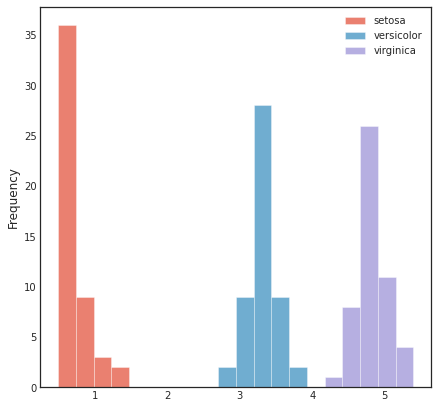

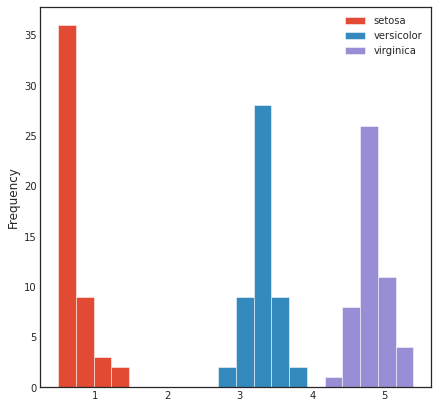

In [ ]:
# Subset setosa
setosa_euc = euc.loc[data["target"] == 0, :]
setosa_euc
# Get average distance of setosa against versicolor and virginica
df = pd.DataFrame(index=setosa_euc.index)
df["setosa"]=setosa_euc.loc[:,data["target"]==0].mean(axis=1)
df["versicolor"] = setosa_euc.loc[:, data["target"] == 1].mean(axis=1)
df["virginica"] = setosa_euc.loc[:, data["target"] == 2].mean(axis=1)
# Plot
df.plot.hist(bins=20, alpha=0.7)
df.plot.hist(bins=20)

#### SOLUTIONS

**1. Using the iris dataset, compute the four distance matrices for all the four metrics above. What shape do they have?**

In [ ]:
# Euclidean distance
euc = pd.DataFrame(
    pairwise_distances(X, metric="euclidean"), index=X.index, columns=X.index
)
# Manhattan distance
man = pd.DataFrame(
    pairwise_distances(X, metric="manhattan"), index=X.index, columns=X.index
)
# Pearson correlation distance
pearsond = 1 - X.T.corr(method="pearson")
# Spearman correlation distance
spearmand = 1 - X.T.corr(method="spearman")

# Shape of distance matrices
euc.shape

(150, 150)

**2. Identify the most distant and most similar pairs of items by each of the methods. Exclude the diagonals (i.e. distances between one item with itself).**

In [ ]:
# Euclidean distance
print("Euclidean Distance")
np.fill_diagonal(euc.values, np.nan)
print(euc[euc == euc.min().min()].dropna(axis=0, how="all").dropna(axis=1, how="all"))
print(euc[euc == euc.max().max()].dropna(axis=0, how="all").dropna(axis=1, how="all"))
# Manhattan distance
print("Manhattan Distance")
np.fill_diagonal(man.values, np.nan)
print(man[man == man.min().min()].dropna(axis=0, how="all").dropna(axis=1, how="all"))
print(man[man == man.max().max()].dropna(axis=0, how="all").dropna(axis=1, how="all"))
# Pearson correlation distance
print("Pearson Distance")
np.fill_diagonal(pearsond.values, np.nan)
print(
    pearsond[pearsond == pearsond.min().min()]
    .dropna(axis=0, how="all")
    .dropna(axis=1, how="all")
)
print(
    pearsond[pearsond == pearsond.max().max()]
    .dropna(axis=0, how="all")
    .dropna(axis=1, how="all")
)
# Spearman correlation distance
print("Spearman Distance")
np.fill_diagonal(spearmand.values, np.nan)
print(
    spearmand[spearmand == spearmand.min().min()]
    .dropna(axis=0, how="all")
    .dropna(axis=1, how="all")
)
print(
    spearmand[spearmand == spearmand.max().max()]
    .dropna(axis=0, how="all")
    .dropna(axis=1, how="all")
)

Euclidean Distance
     101  142
101  NaN  0.0
142  0.0  NaN
          13        118
13        NaN  7.085196
118  7.085196       NaN
Manhattan Distance
     101  142
101  NaN  0.0
142  0.0  NaN
      22    118
22    NaN  12.1
118  12.1   NaN
Pearson Distance
     101  142
101  NaN  0.0
142  0.0  NaN
          22        118
22        NaN  0.642604
118  0.642604       NaN
Spearman Distance
     0    1    2    3    4    5    6    ...  143  144  145  146  147  148  149
0    NaN  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    0.0  0.0  NaN  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    0.0  0.0  0.0  NaN  0.0  0.0  0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4    0.0  0.0  0.0  0.0  NaN  0.0  0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
145  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.0  0.0  N

**3. Subset the Euclidean distance matrix to contain only "setosa" rows (`data["target"]==0`). Then compute the average distance of these setosa items to either setosa themselves, versicolor items, or virginica items. Plot a histogram of how far away are each of the three species from the setosa items (TIP: use `df.plot.hist()` function).**

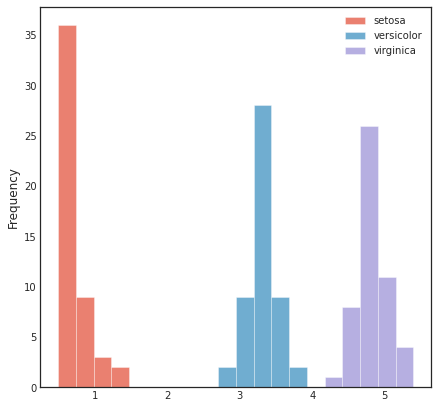

In [ ]:
# Subset setosa
setosa_euc = euc.loc[data["target"] == 0, :]
# Get average distance of setosa against versicolor and virginica
df = pd.DataFrame(index=setosa_euc.index)
df["setosa"] = setosa_euc.loc[:, data["target"] == 0].mean(axis=1)
df["versicolor"] = setosa_euc.loc[:, data["target"] == 1].mean(axis=1)
df["virginica"] = setosa_euc.loc[:, data["target"] == 2].mean(axis=1)
# Plot
df.plot.hist(bins=20, alpha=0.7)

<a id='section2'></a>
## 2. k-means clustering

K-means clustering is one of the most popular clustering algorithms for its simplicity and broad applicability. It tries to cluster the samples into *k* pre-defined groups using all the features.

### Lloyd's Algorithm (a.k.a. naive k-means)

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width="25%">


Lloyd's algorithm is one of the first implementations of k-means clustering that consists of:

0. **Initialization**:
    - Pre-define **k** groups (clusters) of observations.
    - Pre-define **k** centroids sampling randomly from the observations.
1. **Assignment**: Assign every observation to a cluster initializing centroids.
2. **Update**: Calculate the centroid (mean) across observations within the cluster.
3. Go back to 1, until the cluster assignments don't change or we reach a maximum number of iterations.

#### EXERCISES

(150, 5)


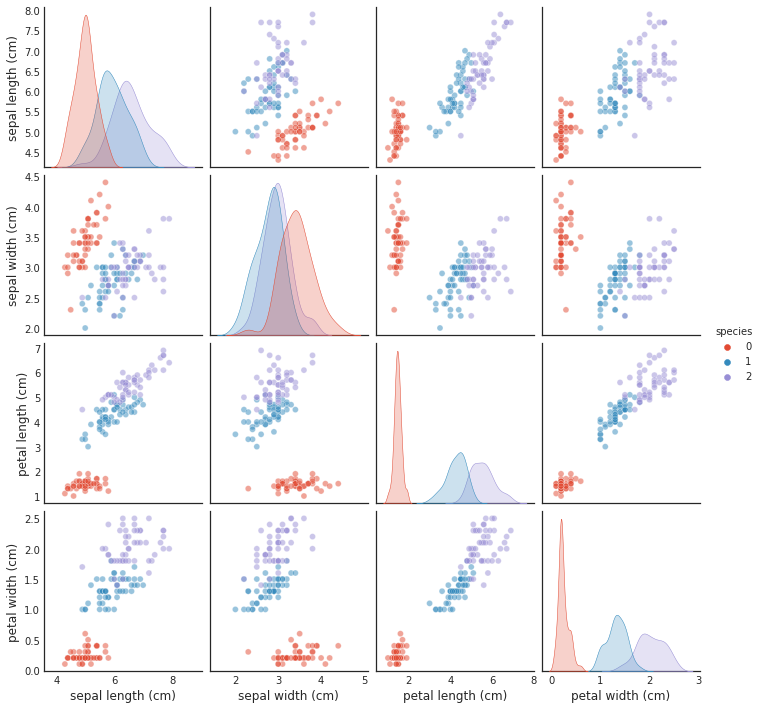

In [ ]:
# sample data
X = pd.DataFrame(data["data"], columns=data["feature_names"])
X["species"] = data["target"]
print(X.shape)

sns.pairplot(X.astype({"species": "category"}), hue="species", plot_kws={"alpha": 0.5})
plt.show()

**1. As you can see below, the iris dataset comprises information on 3 different plant species. Can k-means find them through the information from the rest of the variables? Apply `sklearn.cluster.KMeans` to the iris dataset to check it. Which *k* would you use?**

In [ ]:
from sklearn.cluster import KMeans

help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

In [ ]:
# initialize the model
a=KMeans(n_clusters=3)
a.fit_predict(X)
# get cluster labels
a.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**2. Try using `sns.pairplot` to visualize how the algorithm behaved.**

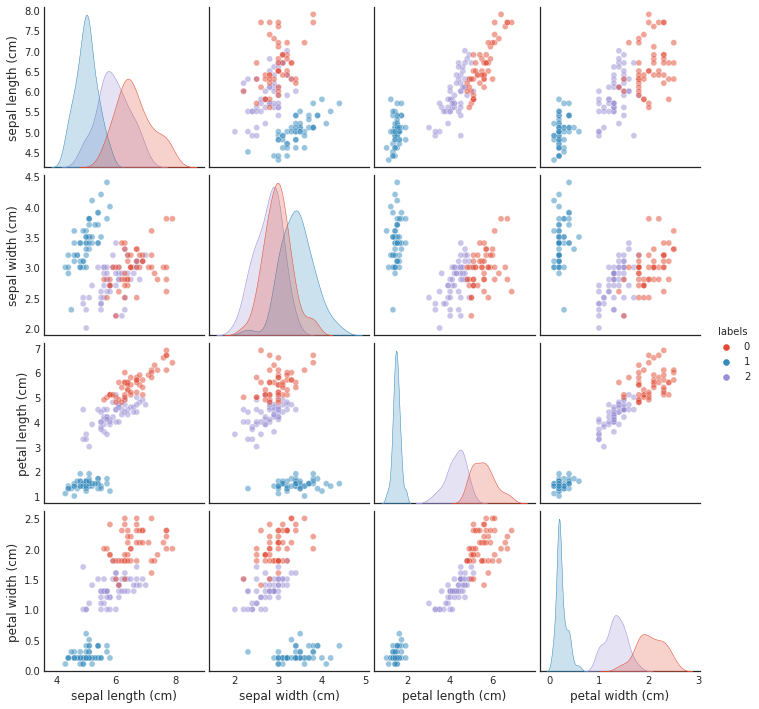

In [ ]:
# define the labels as a new column of the dataframe
X['labels']=a.labels_

# visualize (NOTE: you will need to drop the species column and set the cluster labels into a "category" data type)
sns.pairplot(
    X.drop(columns="species").astype({"labels": "category"}),
    hue="labels",
    plot_kws={"alpha": 0.5},
)
plt.show()

**3. (OPTIONAL) Count how well species and predicted labels overlap.**

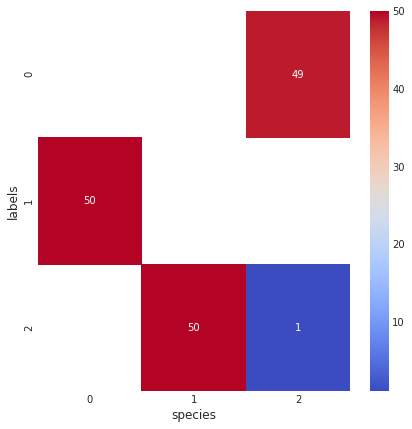

In [ ]:
# Hint: combine the methods groupby(), size(), and pivot_table()
df = (
    X.groupby(["species", "labels"])
    .size()
    .reset_index(name="count")
    .pivot(index="labels", columns="species", values="count")
)
# visualize with sns.heatmap
g = sns.heatmap(df, cmap="coolwarm", annot=True)
plt.show()

**4. (OPTIONAL) Create a function implementing Lloyd's algorithm to perform k-means clustering**

In [ ]:
def kmeans(X, k, metric="euclidean", max_iter=1000):
    """
    Runs naive k-means clustering algorithm.

    Parameters
    ----------
    X: np.array; with observations as rows and features as columns.
    k: int; number of clusters.
    metric: str; desired distance metric to use.
    max_iter: int; maximum number of iterations allowed.

    Returns
    -------
    labels: np.array; cluster labels.

    Example
    -------
    from sklearn.datasets import load_iris
    X = load_iris()['data']
    k = 3
    labels = kmeans(X, k)
    print(labels)
    """

    # initialization
    ## randomly start centroids
    idx = np.random.choice(np.arange(X.shape[0]), k)
    centroids = X[idx, :]
    ## measure the distances of all observations to the randomly chosen
    d = pairwise_distances(X, centroids, metric=metric)
    ## assign cluster labels to each observation
    labels = np.argmin(d, axis=1)

    # iterate until convergence or reaching 'max_iter'
    for it in range(max_iter):
    ## update the centroids
        centroids = np.stack(
            [np.mean(X[labels == label, :], axis=0) for label in np.unique(labels)]
        )

    ## measure the distances of all observations to the randomly chosen
    d = pairwise_distances(X, centroids, metric=metric)

    ## assign cluster labels to each observation
    labels_old = labels
        labels = np.argmin(d, axis=1)

    ## have the cluster labels changed?
    has_converged = all(labels == labels_old)
        if has_converged:
            break

    ## notify in case of no convergence
    if it == (max_iter - 1):
            print("WARNING: no convergence.")
    ## return the cluster labels
    return labels







#### SOLUTIONS

**1. As you can see below, the iris dataset comprises information on 3 different plant species. Can k-means find them through the information from the rest of the variables? Apply `sklearn.cluster.KMeans` to the iris dataset to check it. Which *k* would you use?**

In [ ]:
model = KMeans(3)
labels = model.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

**2. Try using `sns.pairplot` to visualize how the algorithm behaved.**

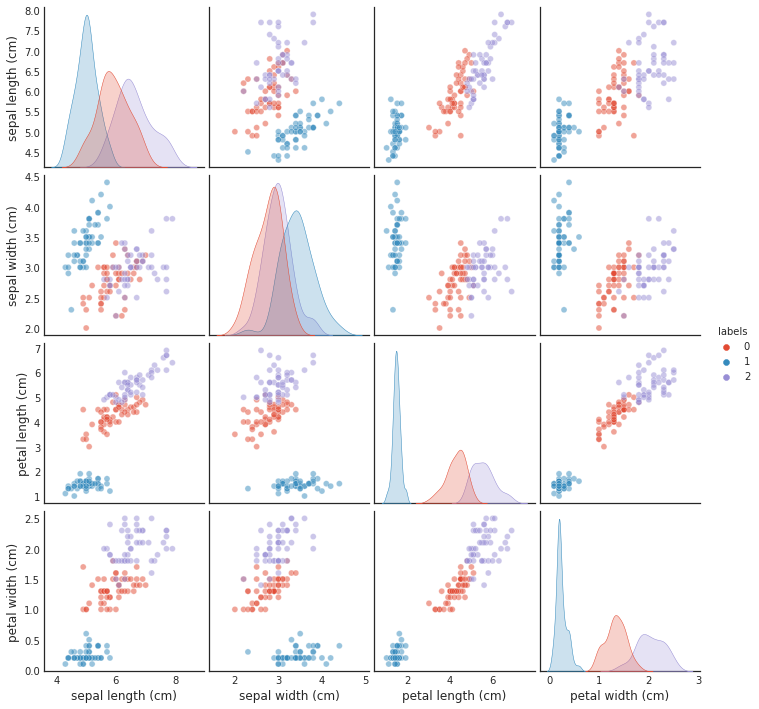

In [ ]:
# run our kmeans
X["labels"] = labels

# visualize
sns.pairplot(
    X.drop(columns="species").astype({"labels": "category"}),
    hue="labels",
    plot_kws={"alpha": 0.5},
)
plt.show()

Although in real unsupervised learning problems we don't have ground truth labels (or we don't know which ones they are), in this case we can see that k-means is able to assign the different plants observed to their species.
Note that in real unsupervised problems we would not have any hint on which *k* to choose.

**3. (OPTIONAL) Count how well species and predicted labels overlap.**

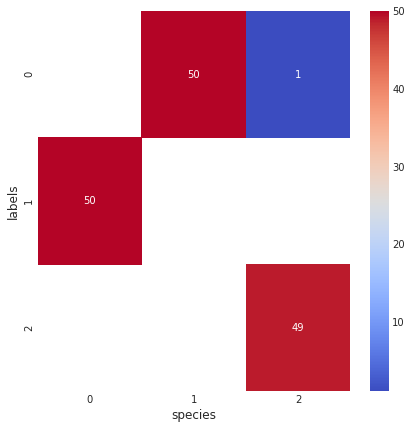

In [ ]:
# How good where we?
df = (
    X.groupby(["species", "labels"])
    .size()
    .reset_index(name="count")
    .pivot(index="labels", columns="species", values="count")
)

g = sns.heatmap(df, cmap="coolwarm", annot=True)
plt.show()

**4. (OPTIONAL) Create a function implementing Lloyd's algorithm to perform k-means clustering**

In [ ]:
def kmeans(X, k, metric="euclidean", max_iter=1000):
    """
    Runs naive k-means clustering algorithm.

    Parameters
    ----------
    X: np.array; with observations as rows and features as columns.
    k: int; number of clusters.
    metric: str; desired distance metric to use in sklearn.metrics.pairwise_distances().
    max_iter: int; maximum number of iterations allowed.

    Returns
    -------
    labels: np.array; cluster labels.

    Example
    -------
    from sklearn.datasets import load_iris
    X = load_iris()['data']
    k = 3
    labels = kmeans(X, k)
    print(labels)
    """

    # initialization
    ## randomly start centroids
    idx = np.random.choice(np.arange(X.shape[0]), k)
    centroids = X[idx, :]
    ## measure the distances of all observations to the randomly chosen
    d = pairwise_distances(X, centroids, metric=metric)
    ## assign cluster labels to each observation
    labels = np.argmin(d, axis=1)

    # iterate until convergence or reaching 'max_iter'
    for it in range(max_iter):
        # update the centroids
        centroids = np.stack(
            [np.mean(X[labels == label, :], axis=0) for label in np.unique(labels)]
        )

        # measure the distances of all observations to the randomly chosen
        d = pairwise_distances(X, centroids, metric=metric)

        # assign cluster labels to each observation
        labels_old = labels
        labels = np.argmin(d, axis=1)

        # have the cluster labels changed?
        has_converged = all(labels == labels_old)
        if has_converged:
            break

        # notify in case of no convergence
        if it == (max_iter - 1):
            print("WARNING: no convergence.")

    return labels


help(kmeans)

Help on function kmeans in module __main__:

kmeans(X, k, metric='euclidean', max_iter=1000)
    Runs naive k-means clustering algorithm.
    
    Parameters
    ----------
    X: np.array; with observations as rows and features as columns.
    k: int; number of clusters.
    metric: str; desired distance metric to use in sklearn.metrics.pairwise_distances().
    max_iter: int; maximum number of iterations allowed.
    
    Returns
    -------
    labels: np.array; cluster labels.
    
    Example
    -------
    from sklearn.datasets import load_iris
    X = load_iris()['data']
    k = 3
    labels = kmeans(X, k)
    print(labels)



<a id='section3'></a>
## 3. Hierarchical clustering
Hierarchical clustering can generally be divided in two types:
- **Agglomerative**: "bottom-up", each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- **Divisive**: "top-down", all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In this session we will focus on the more popular agglomerative approach. Given a set of N items to be clustered, and an N*N distance (or similarity) matrix, this is the basic process of agglomerative hierarchical clustering:

1. Start by assigning each item to a cluster, so that if you have N items, you now have N clusters, each containing just one item.
2. Find the closest (most similar) pair of clusters and merge them into a single cluster, so that now you have one cluster less.
3. Compute distances between the new cluster and each of the old clusters.
4. Repeat steps 2 and 3 until all items are clustered into a single cluster of size N.

<img src="https://dashee87.github.io/images/hierarch.gif" width="75%">
    
### Linkage criteria
The key element in this process is how the similarity/distance between two clusters is computed (step 3 above), the so-called *linkage*. Some commonly used linkage criteria are:
- **Maximum or complete-linkage clustering**: it computes the distance between two clusters as the distance between the two points in each cluster that are furthest together. It results in a large number of well-balanced compact clusters, sometimes keeping similar observations in separate clusters.

$$
d_{AB} = \mbox{max}_{i \in A,j \in B} d_{ij}
$$


- **Minimum or single-linkage clustering**: it computes the distance between two clusters as the distance between the two points in each cluster that are closest together. It results in a few clusters consisting of long extensive chains of observations as well as several singletons (observations that form their own cluster, i.e. outliers). Disparate clusters may be joined when they have two close points, but are otherwise far apart.

$$
d_{AB} = \mbox{min}_{i \in A,j \in B} d_{ij}
$$


- **Unweighted Pair Group Method with Arithmetic Mean (or UPGMA)**: average of all pairwise dissimilarities between observations $i$ in cluster $A$ and $j$ in cluster $B$, where $n$ is the number of observations in each cluster. It is a compromise between complete-linkage and single-linkage.

$$
d_{AB} = \frac{\sum_{i \in A} \sum_{j \in B} d_{ij}}{n_A.n_B}
$$


- **Ward's minimum variance method**: Ward's method only works with Euclidean distances and it aims at minimizing the total within-cluster variance (i.e. get the most compact clusters possible). Therefore, at each step 2 above, it finds the pair of clusters that leads to minimum increase in total within-cluster variance (aka *sum of squares*) after merging. As a result, it leads to nicely balanced clusters.


<img src="https://dashee87.github.io/images/hierarch_1.gif" width="75%">


#### EXERCISES

In [ ]:
from sklearn.cluster import AgglomerativeClustering

X = pd.DataFrame(data["data"], columns=data["feature_names"])
X.head()

# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

**1. Using the default options of the `AgglomerativeClustering` function, run the hierarchical algorithm. Plot using the function above.**

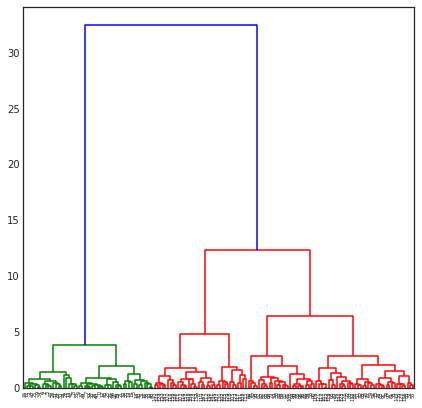

In [ ]:
# Compute clustering
a = AgglomerativeClustering(compute_distances=True)
a.fit(X)
# Plot
plot_dendrogram(a)

**The default `AgglomerativeClustering` uses euclidean distances and Ward's minimum variance method, and takes as an input the data matrix (`X`). However, any custom distance metric can be inputted using the `affinity` parameter. Also, the linkage can be customized using the `linkage` parameter. Take a look:**

In [ ]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |    

**2. Using Pearson correlation as the distance metric, compute the agglomerative clusering with UPGMA linkage.**

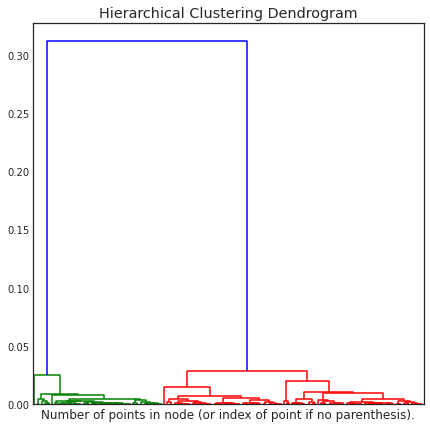

In [ ]:
# Compute distances
pearsond = 1 - X.T.corr(method="pearson")
# Compute clustering
clustering = AgglomerativeClustering(
    compute_distances=True, linkage="average", affinity="precomputed"
).fit(pearsond)
# Plot
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, no_labels=True)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


**3. Using euclidean distances, try out the 4 possible linkages described above. Build the respective dendograms.**

Text(0.5, 1.0, 'Single')

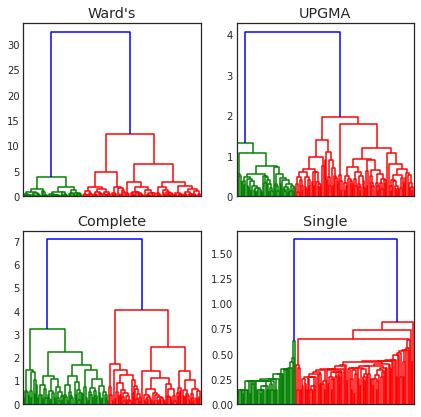

In [ ]:
fig, axs = plt.subplots(2, 2)
plt.subplot(2, 2, 1)
clustering = AgglomerativeClustering(compute_distances=True, linkage="ward").fit(X)
plot_dendrogram(clustering, no_labels=True)
plt.title("Ward's")
plt.subplot(2, 2, 2)
clustering = AgglomerativeClustering(compute_distances=True, linkage="average").fit(X)
plot_dendrogram(clustering, no_labels=True)
plt.title("UPGMA")
plt.subplot(2, 2, 3)
clustering = AgglomerativeClustering(compute_distances=True, linkage="complete").fit(X)
plot_dendrogram(clustering, no_labels=True)
plt.title("Complete")
plt.subplot(2, 2, 4)
clustering = AgglomerativeClustering(compute_distances=True, linkage="single").fit(X)
plot_dendrogram(clustering, no_labels=True)
plt.title("Single")

**4. Cutting the dendogram at number of clusters 3, compare how did each of the linkages perform in order to classify the real 3 species of the iris dataset. Use heatmaps as in the kmeans exercise.**

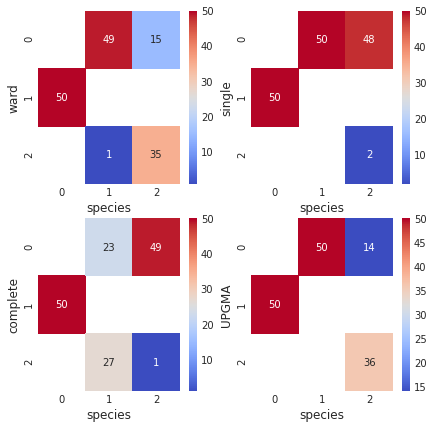

In [ ]:
Y = X.copy()
# Compute clusterings
Y["ward"] = AgglomerativeClustering(linkage="ward", n_clusters=3).fit_predict(X)
Y["single"] = AgglomerativeClustering(linkage="single", n_clusters=3).fit_predict(X)
Y["complete"] = AgglomerativeClustering(linkage="complete", n_clusters=3).fit_predict(X)
Y["UPGMA"] = AgglomerativeClustering(linkage="average", n_clusters=3).fit_predict(X)
# Add real data to compare
Y["species"] = data["target"]
# Plot heatmaps
fig, axs = plt.subplots(2, 2)


# Compute clusterings
for n, l in enumerate(["ward", "single", "complete", "UPGMA"]):
    df = (
        Y.groupby(["species", l])
        .size()
        .reset_index(name="count")
        .pivot(index=l, columns="species", values="count")
    )
# Add real data
    plt.subplot(2, 2, n + 1)
# Plot
    sns.heatmap(df, cmap="coolwarm", annot=True)

**5. (OPTIONAL) To bring a more realistic case, we will work with the
[Human lung carcinomas microarray dataset](https://doi.org/10.1073/pnas.191502998) from Bhattacharjee et al. Classes of samples are described in the publication:**

* normal lung (NL)
* neuroendocrine tumors
  * small-cell lung cancer (SMCL)
  * pulmonary carcinoids (COID)
* squamous cell lung carcinoma (SQ)
* adenocarcinomas (AD)

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/IvoLeist/ml_cnag-crg_course/main/day4/data/DatasetA_12600gene.csv", header=0)
# input matrix with features as columns
dt = dataset.transpose()
cols = dt.iloc[0]
dt = dt.iloc[
    3:,
]
dt.columns = cols
dt = dt.apply(pd.to_numeric, errors="coerce")
dt.head()
# We extract tumor class indicators from sample names.
samples = pd.Series(list(dt.index)[0:])
classes = samples.str.extract(r"(AD|NL|SMCL|SQ|COID)")
dt["Class"] = classes.values
avgs = dt.groupby(["Class"]).mean()
avgs

probe set,AFFX-MurIL2_at,AFFX-MurIL10_at,AFFX-MurIL4_at,AFFX-MurFAS_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,AFFX-hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,...,146_at,147_at,148_at,149_at,150_at,151_s_at,152_f_at,153_f_at,154_at,112_g_at,113_i_at,114_r_at,115_at,116_at,117_at,118_at,120_at,121_at,122_at,123_at,126_s_at,128_at,129_g_at,130_s_at,131_at,133_at,134_at,135_g_at,110_at,111_at,100_g_at,101_at,102_at,103_at,104_at,105_at,106_at,107_at,108_g_at,109_at
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AD,-9.087269,4.543054,0.928406,19.269064,-13.156089,-18.529660,-5.172013,24.822834,-21.958954,-52.713260,61.621972,-18.895657,3.336107,65.986453,-1.294629,-78.176673,-30.662287,-12.530365,-0.420280,2.361210,-7.545772,-35.869367,7113.012336,5.307926,19.264148,-4.807123,2.613960,-10.135176,13.768236,-8.346374,-8.080292,-2.720444,-1.932841,-0.597901,-29.462050,6.080906,-23.266606,-1.516186,24.746947,109.350499,...,57.767767,70.204416,113.294307,70.741350,10.519300,1320.615693,-7.697080,11.263728,0.809811,5.447427,9.855943,-17.404775,21.487336,20.052409,55.021345,18.042236,78.108467,365.735934,0.681867,11.660639,-0.266995,57.855127,47.892981,77.121931,22.148613,364.718007,-8.207932,-1.032165,109.399720,51.918480,133.349664,7.258388,19.817749,15.594775,44.188588,2.528340,36.428242,30.383193,-58.709681,69.901746
COID,13.829500,28.331500,18.926000,42.112500,-5.235500,-9.738500,14.539000,35.837500,-18.217000,-46.033500,87.032000,-10.297500,23.424500,44.108500,29.598000,-83.260500,-36.270000,-7.498000,-11.133000,25.303000,0.424500,-31.094500,8112.563500,22.158500,37.322500,10.113500,23.539000,3.289000,32.472000,3.071000,3.902000,20.580000,15.172000,13.081000,-29.237500,22.991000,-14.171000,15.089500,21.180500,27.574500,...,96.853500,119.889500,176.637500,53.031000,36.552000,826.548000,-7.057500,31.085000,17.464000,22.512000,74.891000,-4.069000,-3.286000,38.529000,48.736500,9.356500,68.099500,490.672500,3.707500,31.871500,14.672500,23.069500,15.044000,9.377500,36.418000,79.852000,14.434500,13.680000,148.505000,98.620000,212.381500,9.659500,31.112000,48.095000,69.513500,20.926500,34.480500,48.644000,-24.081500,96.400000
NL,-18.127647,-7.629412,-10.631176,13.154706,-32.394706,-44.083529,-7.740000,14.532353,-31.537647,-57.608235,5.212941,-28.114706,-9.702941,34.454118,-59.194706,-74.014706,-36.274118,-27.400588,-32.062941,-3.022353,-18.720000,-44.263529,6959.832941,-8.578235,0.215882,-14.798235,-7.772353,-25.108235,2.378235,-19.387647,-20.981176,-13.592353,-13.650588,-14.556471,-43.048824,-5.587059,-33.995294,-12.255294,-2.908824,44.441765,...,60.267059,52.087059,66.525294,38.756471,0.137647,1012.047059,-32.218824,-3.255294,-10.142353,-7.681176,-1.930000,-31.380588,15.664118,3.398235,48.138824,-6.143529,106.628824,373.829412,-20.357647,4.952941,-14.256471,13.675294,5.457647,52.782353,14.517059,454.737647,-18.234706,-11.641765,128.422941,41.464706,105.974118,-7.731765,2.073529,-4.917059,34.986471,-8.917059,31.642353,34.871765,-86.042941,55.991176
SMCL,13.911667,21.578333,12.183333,32.351667,-12.508333,-26.431667,-0.141667,32.843333,-23.228333,-57.068333,61.445000,-17.446667,20.201667,84.851667,12.290000,-98.156667,-49.093333,-12.505000,-4.420000,41.563333,-2.208333,-27.406667,7606.985000,24.681667,37.523333,4.940000,14.911667,-5.333333,30.388333,-2.863333,-1.661667,10.031667,14.351667,6.556667,-26.320000,15.571667,-22.831667,15.561667,35.310000,133.663333,...,56.650000,78.533333,146.616667,200.325000,28.878333,2772.378333

**Using this dataset of averages, compute a hierarchical clustering with Manhattan distances and UPGMA linkage. Check how well are the 5 different classes of samples classified.**

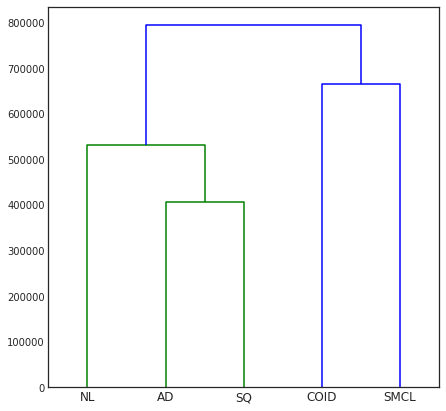

In [ ]:
# Compute clustering and plot dendogram
clustering = AgglomerativeClustering(
    compute_distances=True, affinity="manhattan", linkage="average"
).fit(avgs)
plot_dendrogram(clustering, labels=avgs.index)

#### SOLUTIONS

**1. Using the default options of the `AgglomerativeClustering` function, run the hierarchical algorithm. Plot using the function above.**

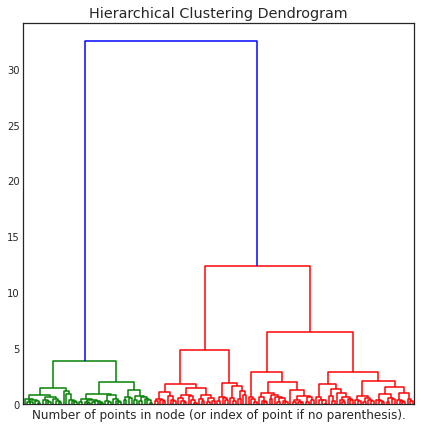

In [ ]:
# Compute clustering
clustering = AgglomerativeClustering(compute_distances=True).fit(X)
# Plot
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, no_labels=True)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**The default `AgglomerativeClustering` uses euclidean distances and Ward's minimum variance method, and takes as an input the data matrix (`X`). However, any custom distance metric can be inputted using the `affinity` parameter. Also, the linkage can be customized using the `linkage` parameter. Take a look:**

In [ ]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |    

**2. Using Pearson correlation as the distance metric, compute the agglomerative clusering with UPGMA linkage.**

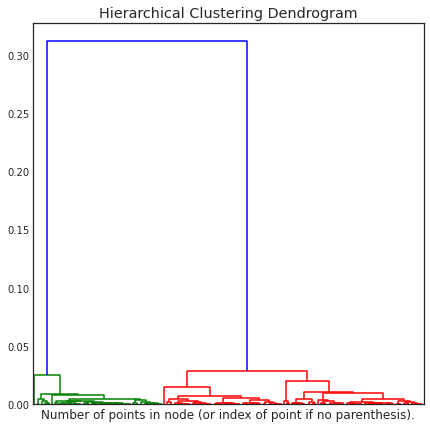

In [ ]:
# Compute distances
pearsond = 1 - X.T.corr(method="pearson")
# Compute clustering
clustering = AgglomerativeClustering(
    compute_distances=True, linkage="average", affinity="precomputed"
).fit(pearsond)
# Plot
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, no_labels=True)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**3. Using euclidean distances, try out the 4 possible linkages described above. Build the respective dendograms.**

Text(0.5, 1.0, 'Single')

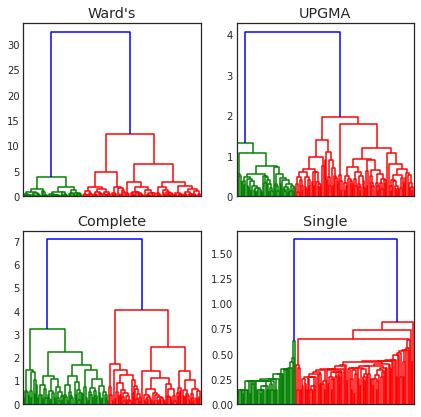

In [ ]:
fig, axs = plt.subplots(2, 2)
plt.subplot(2, 2, 1)
clustering = AgglomerativeClustering(compute_distances=True, linkage="ward").fit(X)
plot_dendrogram(clustering, no_labels=True)
plt.title("Ward's")
plt.subplot(2, 2, 2)
clustering = AgglomerativeClustering(compute_distances=True, linkage="average").fit(X)
plot_dendrogram(clustering, no_labels=True)
plt.title("UPGMA")
plt.subplot(2, 2, 3)
clustering = AgglomerativeClustering(compute_distances=True, linkage="complete").fit(X)
plot_dendrogram(clustering, no_labels=True)
plt.title("Complete")
plt.subplot(2, 2, 4)
clustering = AgglomerativeClustering(compute_distances=True, linkage="single").fit(X)
plot_dendrogram(clustering, no_labels=True)
plt.title("Single")

**4. Cutting the dendogram at number of clusters 3, compare how did each of the linkages perform in order to classify the real 3 species of the iris dataset. Use heatmaps as in the kmeans exercise.**

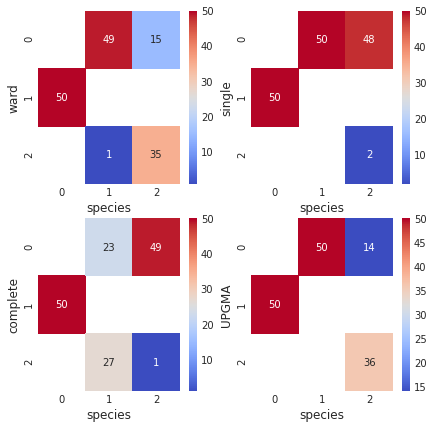

In [ ]:
Y = X.copy()
# Compute clusterings
Y["ward"] = AgglomerativeClustering(linkage="ward", n_clusters=3).fit_predict(X)
Y["single"] = AgglomerativeClustering(linkage="single", n_clusters=3).fit_predict(X)
Y["complete"] = AgglomerativeClustering(linkage="complete", n_clusters=3).fit_predict(X)
Y["UPGMA"] = AgglomerativeClustering(linkage="average", n_clusters=3).fit_predict(X)
# Add real data
Y["species"] = data["target"]
# Plot
fig, axs = plt.subplots(2, 2)
for n, l in enumerate(["ward", "single", "complete", "UPGMA"]):
    df = (
        Y.groupby(["species", l])
        .size()
        .reset_index(name="count")
        .pivot(index=l, columns="species", values="count")
    )
    plt.subplot(2, 2, n + 1)
    sns.heatmap(df, cmap="coolwarm", annot=True)

**5. (OPTIONAL) To bring a more realistic case, we will work with the
[Human lung carcinomas microarray dataset](https://doi.org/10.1073/pnas.191502998) from Bhattacharjee et al. Classes of samples are described in the publication:**

* normal lung (NL)
* neuroendocrine tumors
  * small-cell lung cancer (SMCL)
  * pulmonary carcinoids (COID)
* squamous cell lung carcinoma (SQ)
* adenocarcinomas (AD)

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/IvoLeist/ml_cnag-crg_course/main/day4/data/DatasetA_12600gene.csv", header=0)
# input matrix with features as columns
dt = dataset.transpose()
cols = dt.iloc[0]
dt = dt.iloc[
    3:,
]
dt.columns = cols
dt = dt.apply(pd.to_numeric, errors="coerce")
dt.head()
# We extract tumor class indicators from sample names.
samples = pd.Series(list(dt.index)[0:])
classes = samples.str.extract(r"(AD|NL|SMCL|SQ|COID)")
dt["Class"] = classes.values
avgs = dt.groupby(["Class"]).mean()
avgs

probe set,AFFX-MurIL2_at,AFFX-MurIL10_at,AFFX-MurIL4_at,AFFX-MurFAS_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,AFFX-hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,...,146_at,147_at,148_at,149_at,150_at,151_s_at,152_f_at,153_f_at,154_at,112_g_at,113_i_at,114_r_at,115_at,116_at,117_at,118_at,120_at,121_at,122_at,123_at,126_s_at,128_at,129_g_at,130_s_at,131_at,133_at,134_at,135_g_at,110_at,111_at,100_g_at,101_at,102_at,103_at,104_at,105_at,106_at,107_at,108_g_at,109_at
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AD,-9.087269,4.543054,0.928406,19.269064,-13.156089,-18.529660,-5.172013,24.822834,-21.958954,-52.713260,61.621972,-18.895657,3.336107,65.986453,-1.294629,-78.176673,-30.662287,-12.530365,-0.420280,2.361210,-7.545772,-35.869367,7113.012336,5.307926,19.264148,-4.807123,2.613960,-10.135176,13.768236,-8.346374,-8.080292,-2.720444,-1.932841,-0.597901,-29.462050,6.080906,-23.266606,-1.516186,24.746947,109.350499,...,57.767767,70.204416,113.294307,70.741350,10.519300,1320.615693,-7.697080,11.263728,0.809811,5.447427,9.855943,-17.404775,21.487336,20.052409,55.021345,18.042236,78.108467,365.735934,0.681867,11.660639,-0.266995,57.855127,47.892981,77.121931,22.148613,364.718007,-8.207932,-1.032165,109.399720,51.918480,133.349664,7.258388,19.817749,15.594775,44.188588,2.528340,36.428242,30.383193,-58.709681,69.901746
COID,13.829500,28.331500,18.926000,42.112500,-5.235500,-9.738500,14.539000,35.837500,-18.217000,-46.033500,87.032000,-10.297500,23.424500,44.108500,29.598000,-83.260500,-36.270000,-7.498000,-11.133000,25.303000,0.424500,-31.094500,8112.563500,22.158500,37.322500,10.113500,23.539000,3.289000,32.472000,3.071000,3.902000,20.580000,15.172000,13.081000,-29.237500,22.991000,-14.171000,15.089500,21.180500,27.574500,...,96.853500,119.889500,176.637500,53.031000,36.552000,826.548000,-7.057500,31.085000,17.464000,22.512000,74.891000,-4.069000,-3.286000,38.529000,48.736500,9.356500,68.099500,490.672500,3.707500,31.871500,14.672500,23.069500,15.044000,9.377500,36.418000,79.852000,14.434500,13.680000,148.505000,98.620000,212.381500,9.659500,31.112000,48.095000,69.513500,20.926500,34.480500,48.644000,-24.081500,96.400000
NL,-18.127647,-7.629412,-10.631176,13.154706,-32.394706,-44.083529,-7.740000,14.532353,-31.537647,-57.608235,5.212941,-28.114706,-9.702941,34.454118,-59.194706,-74.014706,-36.274118,-27.400588,-32.062941,-3.022353,-18.720000,-44.263529,6959.832941,-8.578235,0.215882,-14.798235,-7.772353,-25.108235,2.378235,-19.387647,-20.981176,-13.592353,-13.650588,-14.556471,-43.048824,-5.587059,-33.995294,-12.255294,-2.908824,44.441765,...,60.267059,52.087059,66.525294,38.756471,0.137647,1012.047059,-32.218824,-3.255294,-10.142353,-7.681176,-1.930000,-31.380588,15.664118,3.398235,48.138824,-6.143529,106.628824,373.829412,-20.357647,4.952941,-14.256471,13.675294,5.457647,52.782353,14.517059,454.737647,-18.234706,-11.641765,128.422941,41.464706,105.974118,-7.731765,2.073529,-4.917059,34.986471,-8.917059,31.642353,34.871765,-86.042941,55.991176
SMCL,13.911667,21.578333,12.183333,32.351667,-12.508333,-26.431667,-0.141667,32.843333,-23.228333,-57.068333,61.445000,-17.446667,20.201667,84.851667,12.290000,-98.156667,-49.093333,-12.505000,-4.420000,41.563333,-2.208333,-27.406667,7606.985000,24.681667,37.523333,4.940000,14.911667,-5.333333,30.388333,-2.863333,-1.661667,10.031667,14.351667,6.556667,-26.320000,15.571667,-22.831667,15.561667,35.310000,133.663333,...,56.650000,78.533333,146.616667,200.325000,28.878333,2772.378333

**Using this dataset of averages, compute a hierarchical clustering with Manhattan distances and UPGMA linkage. Check how well are the 5 different classes of samples classified.**

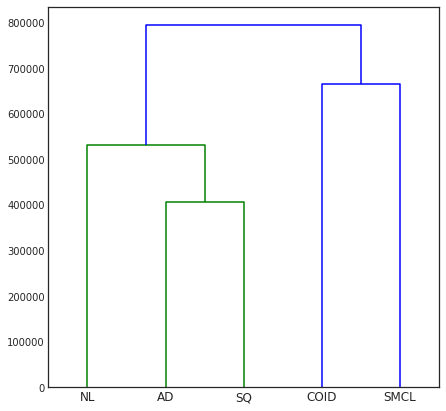

In [ ]:
# Plot dendogram
clustering = AgglomerativeClustering(
    compute_distances=True, affinity="manhattan", linkage="average"
).fit(avgs)
plot_dendrogram(clustering, labels=avgs.index)

<a id='section4'></a>
## 4. Clustering with Gaussian Mixture Models

Gaussian Mixture Models are a type of probabilitic models that try to split the population into *k* pre-defined groups or components based on multivariate normal distributions.

Basicallly, we aim to fit *k* multivariate normal distributions to the data and classify the observations based on their probability of belonging to the different groups.

### The Multivariate Normal Distribution

$$X = (X_1, X_2, ..., X_k)^T$$
$$X \sim N(\mu, \Sigma)$$
$$\mu = E[X] = (E[X_1], E[X_2], ..., E[X_k])^T$$
$$\Sigma_{ij} = E[(X_i - \mu_i)(X_j - \mu_j)] = Cov[X_i, X_j]$$

### Estimating the parameters of the Multivariate Normal distributions

One of the most popular algorithms to determine the parameters of a mixture of multivariate normal distributions is the Expectation-Maximization algorithm to perform maximum likelihood estimation of the parameters.

At the beginning, we know that there are *k* groups of samples. And we assume that each group is characterized by a different multivariate normal distribution.

#### Expectation-Maximization algorithm
Although we don't want to go to much into details, the basic steps to estimate the parameters of the multivariate normal distributions are:

0. **Initialization**: randomly initialize the parameters of *k* multivariate normal distributions and a vector of mixing coefficients
1. **E-step**: compute the probability of every observation of belonging to every distribution.
2. **M-step**: update the mixing coefficients and the parameters of the distributions
3. Iterate until convergence of the parameters.

### Example

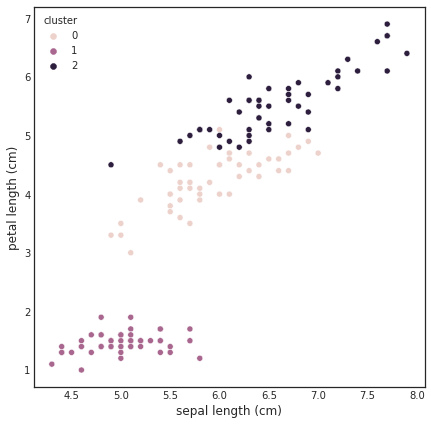

In [ ]:
from sklearn.mixture import GaussianMixture

# sample data
X = pd.DataFrame(data["data"], columns=data["feature_names"])
X["species"] = data["target"]

gm = GaussianMixture(n_components=3)
labels = gm.fit_predict(X)

df = X.assign(cluster=labels)
sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", hue="cluster")
plt.show()

#### EXERCISES

**1. Compare the clusters obtained with `sklearn.cluster.KMeans`.**

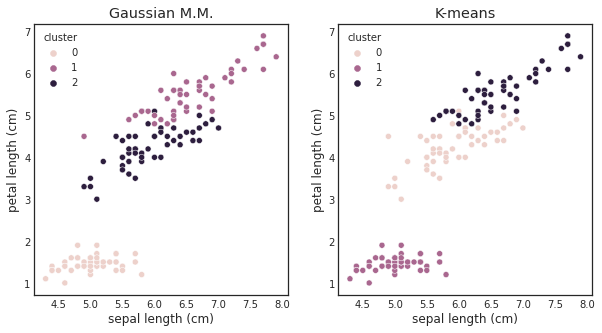

In [ ]:
# use GaussianMixture()
gm = GaussianMixture(n_components=3)
labels_gaussian = gm.fit_predict(X)

# use KMeans()
kmeans = KMeans(3)
labels_kmeans = kmeans.fit_predict(X)

# visualize the cluster labels on the data
plt.figure(figsize=(10, 5))

# Hint: use sns.scatterplot
plt.subplot(121)
sns.scatterplot(
    data=X.assign(cluster=labels_gaussian),
    x="sepal length (cm)",
    y="petal length (cm)",
    hue="cluster",
)
plt.title("Gaussian M.M.")

plt.subplot(122)
sns.scatterplot(
    data=X.assign(cluster=labels_kmeans),
    x="sepal length (cm)",
    y="petal length (cm)",
    hue="cluster",
)
plt.title("K-means")

plt.show()

**2. Can you pinpoint which features drive the common/different clusters?**

     sepal length (cm)  sepal width (cm)  ...  labels_kmeans  labels_gm
0                  5.1               3.5  ...              1          0
1                  4.9               3.0  ...              1          0
2                  4.7               3.2  ...              1          0
3                  4.6               3.1  ...              1          0
4                  5.0               3.6  ...              1          0
..                 ...               ...  ...            ...        ...
145                6.7               3.0  ...              2          1
146                6.3               2.5  ...              2          1
147                6.5               3.0  ...              2          1
148                6.2               3.4  ...              2          1
149                5.9               3.0  ...              2          1

[150 rows x 7 columns]


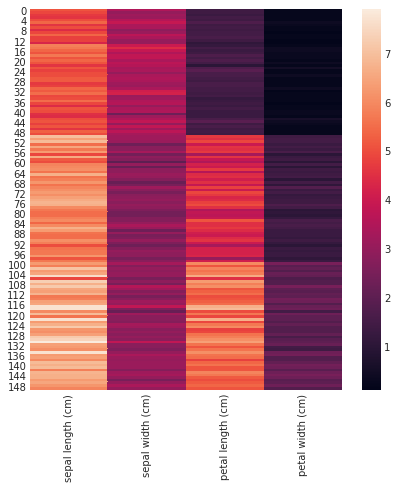

In [ ]:
# check which cluster labels match
df = X.assign(labels_kmeans=labels_kmeans, labels_gm=labels_gaussian)
idx = df["labels_kmeans"] == df["labels_gm"]
print(df.loc[~idx])
# visualize the features of every observation with sns.heatmap
sns.heatmap(X.drop(columns="species"))
plt.show()

#### SOLUTIONS

**1. Compare the clusters obtained with `sklearn.cluster.KMeans`.**

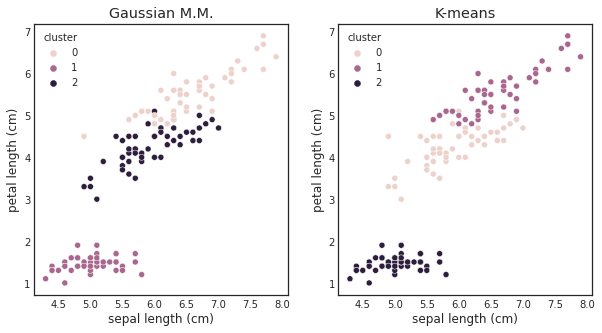

In [ ]:
gm = GaussianMixture(n_components=3)
labels_gaussian = gm.fit_predict(X)

kmeans = KMeans(3)
labels_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(10, 5))

plt.subplot(121)
sns.scatterplot(
    data=X.assign(cluster=labels_gaussian),
    x="sepal length (cm)",
    y="petal length (cm)",
    hue="cluster",
)
plt.title("Gaussian M.M.")

plt.subplot(122)
sns.scatterplot(
    data=X.assign(cluster=labels_kmeans),
    x="sepal length (cm)",
    y="petal length (cm)",
    hue="cluster",
)
plt.title("K-means")

plt.show()

**2. Can you pinpoint which features drive the common/different clusters?**

     sepal length (cm)  sepal width (cm)  ...  labels_kmeans  labels_gm
106                4.9               2.5  ...              2          1

[1 rows x 7 columns]


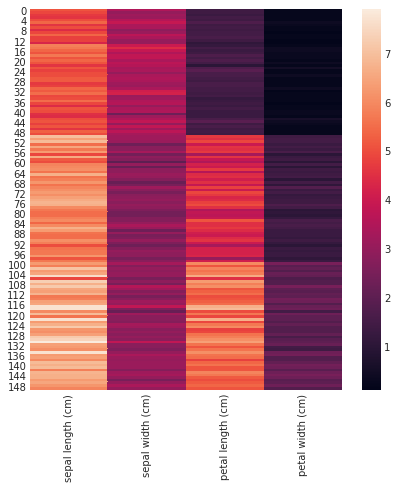

In [ ]:
# check which cluster labels match
df = X.assign(labels_kmeans=labels_kmeans, labels_gm=labels_gaussian)
idx = df["labels_kmeans"] == df["labels_gm"]
print(df.loc[~idx])

# visualize the features of every observation with sns.heatmap
sns.heatmap(X.drop(columns="species"))
plt.show()

<a id='section5'></a>
## 5. Finding the right "key"

<img src="https://media.tenor.com/images/e14e26db422b3e75a29032ff17fbc4eb/tenor.gif" width="35%">

One of the most difficult parts of unsupervised learning is to make an educated guess of how many clusters does our dataset contain.

The most popular methods to assess quantitatively how good the *k* groups in which we have split our observations are:
- **Elbow**: use a metric to score how well the observations cluster with different *k*s overall, plot the scores and choose the *k* at the elbow of the curve. Metrics:
    - Total within-cluster distances to the centroid

- **Silhouette**: visualize the silhouette values for each observation across clusters to assess how well they fit within the cluster considering given the observations outside the cluster.

### Elbow method with Total Sum of Squared errors

Within cluster total sum of squares,
$$SSE = \sum_{p=1}^{N}\sum_{j=1}^{M} (X_{pj} - c_{k_p,j})^2$$


### Slihouette method
- measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation)
- ranges from $[-1, 1]$
- the higher the better
- scores if a point is placed to the right cluster

**Silhouette Value**
$$
    s(i)=
\begin{cases}
    \frac{b(i) - a(i)}{max\{a(i),b(i)\}},& \text{if } |C_i| > 1\\
    0,              & \text{if } |C_i| = 1
\end{cases}
$$

Where, $a(i)$ is the within cluster average distance for each data point $i$ in cluster $C_i$,
$$a(i) = \frac{1}{|C_i| - 1} \sum_{j \in C_i, i \neq j} d(i,j)$$

And, $b(i)$ is the minimum distance of each data point $i$ in cluster $C_i$ with the points in cluster $C_j$:
$$b(i) = min_{i \neq j} \frac{1}{|C_j|} \sum_{j \in C_j} d(i,j)$$

Finally, the overall mean silhouette of all values can be interpreted as the score of the clustering.

We can choose K using the sihouette score through the elbow method

#### EXERCISES

In [ ]:
# exercise data
X = data["data"]

# sum squared errors
def SSE(x):
    centroid = np.mean(x, axis=0).reshape(1, -1)
    sse = (x - centroid) ** 2
    sse = np.sum(sse)
    return sse


SSE([1, 2, 3, 4])

5.0

**1. Use the elbow method to choose the best *k* to cluster the iris dataset with KMeans. Try to use the function you just created.**

In [ ]:
from sklearn.cluster import KMeans

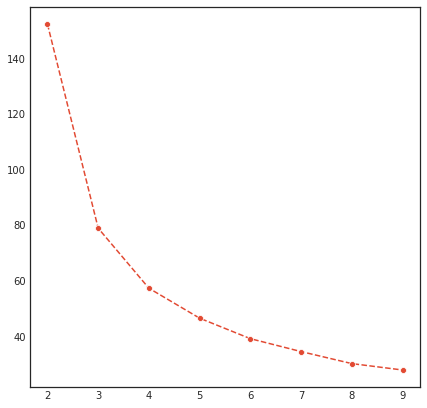

In [ ]:
# run kmeans for different keys
keys = np.arange(2, 10)
labels_bykey = {k: KMeans(k).fit_predict(X) for k in keys}

# for every k, measure the average squared error within each cluster
errors = []
for k in keys:
    labels = labels_bykey[k]
    error = 0
    for label in np.unique(labels):
        X_incluster = X[labels == label, :]

        # transform into error
        error += SSE(X_incluster)

    # save total error sum
    errors.append(error)

sns.lineplot(x=keys, y=errors, marker="o", linestyle="dashed")
plt.show()
# compute the SSE

# save error

**2. Do we get the same result with a Gaussian Mixture?**

In [ ]:
from sklearn.mixture import GaussianMixture

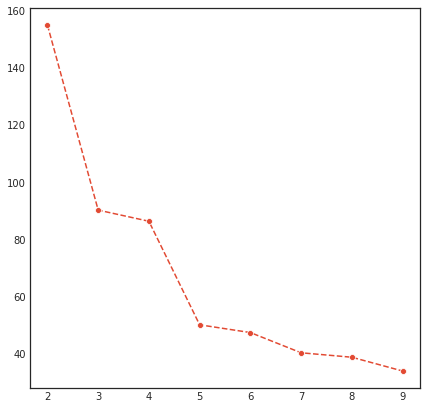

In [ ]:
# cluster for different keys

# for every k, measure the average squared error within each cluster

# compute the SSE

# save error

# cluster for different keys
keys = np.arange(2, 10)
labels_bykey = {k: GaussianMixture(k).fit_predict(X) for k in keys}

# for every k, measure the average squared error within each cluster
errors = []
for k in keys:
    labels = labels_bykey[k]
    error = 0
    for label in np.unique(labels):
        X_incluster = X[labels == label, :]

        # transform into error
        error += SSE(X_incluster)

    # save total error sum
    errors.append(error)

sns.lineplot(x=keys, y=errors, marker="o", linestyle="dashed")
plt.show()

**3. Cluster the iris dataset with your favourite algorithm and apply the silhouette method through `sklearn.metrics.silhouette_score` and `sklearn.metrics.silhouette_samples` for one *k*. Try to visualize the result.**

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

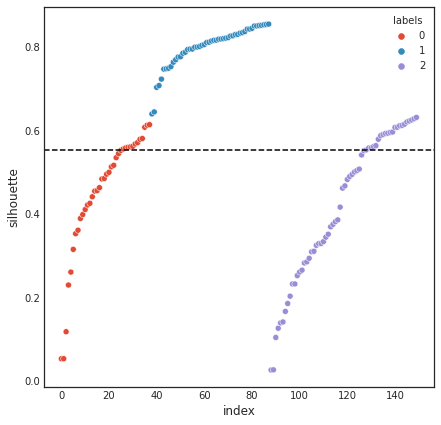

In [ ]:
# compute KMeans with random_state=123
labels = KMeans(3, random_state=123).fit_predict(X)

# get silhouette scores for every sample and overall mean
sil_samples = silhouette_samples(X, labels)
sil_score = silhouette_score(X, labels)

df = (
    pd.DataFrame({"labels": labels, "silhouette": sil_samples})
    .sort_values(["labels", "silhouette"])
    .reset_index(drop=True)
    .reset_index()
    .astype({"labels": "category"})
)

sns.scatterplot(x="index", y="silhouette", hue="labels", data=df)
plt.axhline(y=sil_score, linestyle="dashed", color="black")
plt.show()

**4. Which *k* should we use based on the average silhouette score?**

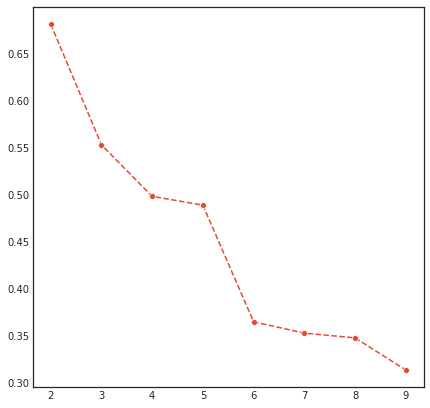

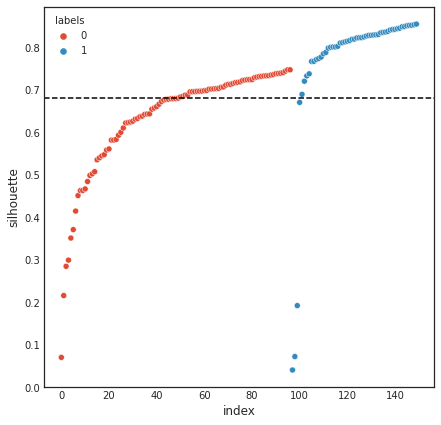

In [ ]:
# use silhouette_score() for different ks
ks = np.arange(2, 10)
sil = np.array([silhouette_score(X, KMeans(k).fit_predict(X)) for k in ks])

# visualize the result
sns.lineplot(x=ks, y=sil, marker="o", linestyle="dashed")
plt.show()

# check out the silhouettes by sample using the new k
labels = KMeans(2, random_state=123).fit_predict(X)
sil = silhouette_samples(X, labels)

df = (
    pd.DataFrame({"labels": labels, "silhouette": sil})
    .sort_values(["labels", "silhouette"])
    .reset_index(drop=True)
    .reset_index()
    .astype({"labels": "category"})
)

sns.scatterplot(x="index", y="silhouette", hue="labels", data=df)
plt.axhline(y=np.mean(sil), linestyle="dashed", color="black")
plt.show()





**6. (OPTIONAL) Create your own function to calculate silhouette values for every cluster**

In [ ]:
def compute_silhouette(X, labels, metric="euclidean"):
    """
    Calculates silhouete value for every observation in X given a set of labels.

    Parameters
    ----------
    X
    labels
    metric

    Returns
    -------
    silhouette: list; silhouette values.

    Example
    -------
    """

    # for every data point (row)
    ## if the cluster size is larger than 1
    ## compute within cluster average distance a
    ## compute between cluster average minimum distance b
    ## compute silhouette value

    ## else, sihouette is 0

    # for every data point (row)
    silhouette = []
    for i in range(X.shape[0]):
        # definitions
        x_i = X[i, :].reshape(1, -1)
        label_i = labels[i]
        C_i = labels == label_i

        # if the cluster size is larger than 1
        clustersize = sum(C_i)
        if clustersize > 1:
            # compute within cluster average distance a
            idx_withincluster = [idx for idx in np.where(C_i)[0] if idx != i]
            a_i = (1 / (clustersize)) * np.sum(
                pairwise_distances(X[idx_withincluster, :], x_i, metric=metric)
            )

            # compute between cluster acerage minimum distance b
            other_labels = [label for label in np.unique(labels) if label != label_i]
            b_ij = []
            for label_j in other_labels:
                idx_othercluster = labels == label_j
                b_ij.append(
                    np.sum(
                        pairwise_distances(X[idx_othercluster, :], x_i, metric=metric)
                    )
                )
            b_i = np.min(b_ij)

            # compute silhouette value
            s = (b_i - a_i) / (np.max([a_i, b_i]))

        # else, sihouette is 0
        else:
            s = 0

        silhouette.append(s)

    return np.array(silhouette)

In this case, we are scoring how well every data point maps to its own cluster with respect to the others.

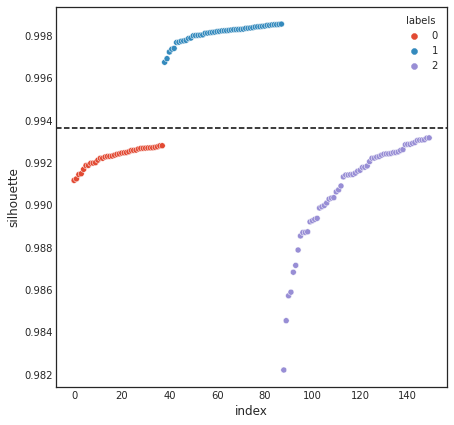

In [ ]:
# test your sihlouette function and visualize the result
X = pd.DataFrame(data["data"], columns=data["feature_names"])
X["labels"] = KMeans(3).fit_predict(X.values)
X["silhouette"] = compute_silhouette(X.values, labels)

df = (
    X.sort_values(["labels", "silhouette"])
    .reset_index(drop=True)
    .reset_index()
    .astype({"labels": "category"})
)

sns.scatterplot(x="index", y="silhouette", hue="labels", data=df)
plt.axhline(np.mean(df["silhouette"]), linestyle="dashed", color="black")
plt.show()

#### SOLUTIONS

**1. Use the elbow method to choose the best *k* to cluster the iris dataset with KMeans. Try to use the function you just created.**

In [ ]:
from sklearn.cluster import KMeans

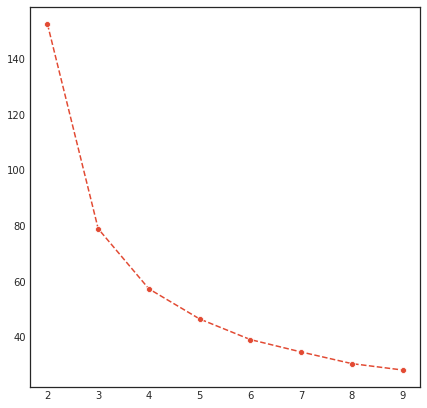

In [ ]:
# run kmeans for different keys
keys = np.arange(2, 10)
labels_bykey = {k: KMeans(k).fit_predict(X) for k in keys}

# for every k, measure the average squared error within each cluster
errors = []
for k in keys:
    labels = labels_bykey[k]
    error = 0
    for label in np.unique(labels):
        X_incluster = X[labels == label, :]

        # transform into error
        error += SSE(X_incluster)

    # save total error sum
    errors.append(error)

sns.lineplot(x=keys, y=errors, marker="o", linestyle="dashed")
plt.show()

**2. Do we get the same result with a Gaussian Mixture?**

In [ ]:
from sklearn.mixture import GaussianMixture

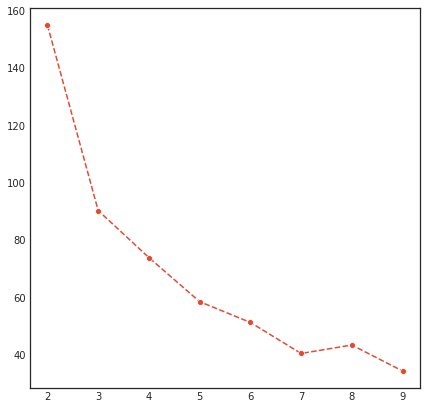

In [ ]:
# cluster for different keys
keys = np.arange(2, 10)
labels_bykey = {k: GaussianMixture(k).fit_predict(X) for k in keys}

# for every k, measure the average squared error within each cluster
errors = []
for k in keys:
    labels = labels_bykey[k]
    error = 0
    for label in np.unique(labels):
        X_incluster = X[labels == label, :]

        # transform into error
        error += SSE(X_incluster)

    # save total error sum
    errors.append(error)

sns.lineplot(x=keys, y=errors, marker="o", linestyle="dashed")
plt.show()

**3. Cluster the iris dataset with your favourite algorithm and apply the silhouette method through `sklearn.metrics.silhouette_score` and `sklearn.metrics.silhouette_samples` for one *k*. Try to visualize the result.**

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

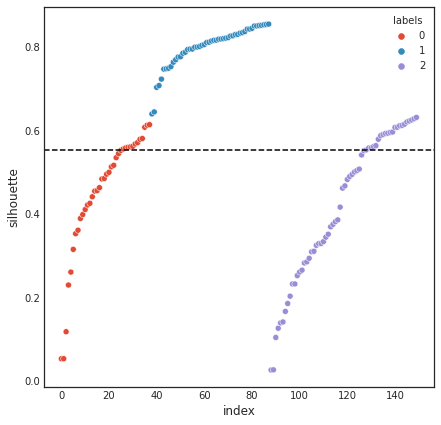

In [ ]:
# compute KMeans with random_state=123
labels = KMeans(3, random_state=123).fit_predict(X)

# get silhouette scores for every sample and overall mean
sil_samples = silhouette_samples(X, labels)
sil_score = silhouette_score(X, labels)

df = (
    pd.DataFrame({"labels": labels, "silhouette": sil_samples})
    .sort_values(["labels", "silhouette"])
    .reset_index(drop=True)
    .reset_index()
    .astype({"labels": "category"})
)

sns.scatterplot(x="index", y="silhouette", hue="labels", data=df)
plt.axhline(y=sil_score, linestyle="dashed", color="black")
plt.show()

**4. Which *k* should we use based on the average silhouette score?**

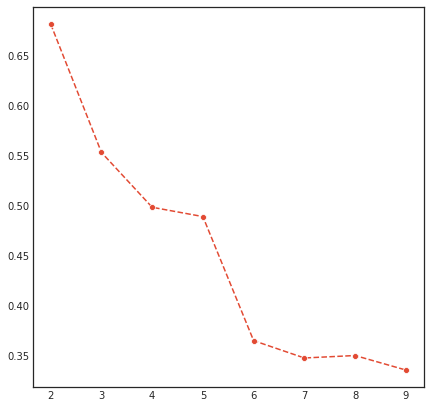

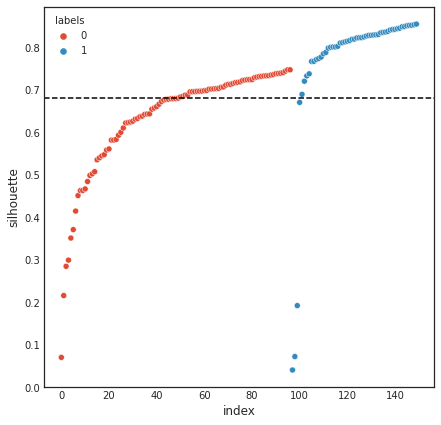

In [ ]:
# use silhouette_score() for different ks
ks = np.arange(2, 10)
sil = np.array([silhouette_score(X, KMeans(k).fit_predict(X)) for k in ks])

# visualize the result
sns.lineplot(x=ks, y=sil, marker="o", linestyle="dashed")
plt.show()

# check out the silhouettes by sample using the new k
labels = KMeans(2, random_state=123).fit_predict(X)
sil = silhouette_samples(X, labels)

df = (
    pd.DataFrame({"labels": labels, "silhouette": sil})
    .sort_values(["labels", "silhouette"])
    .reset_index(drop=True)
    .reset_index()
    .astype({"labels": "category"})
)

sns.scatterplot(x="index", y="silhouette", hue="labels", data=df)
plt.axhline(y=np.mean(sil), linestyle="dashed", color="black")
plt.show()

**6. (OPTIONAL) Create your own function to calculate silhouette values for every cluster**

In [ ]:
def compute_silhouette(X, labels, metric="euclidean"):
    """
    Calculates silhouete value for every observation in X given a set of labels.

    Parameters
    ----------
    X
    labels
    metric

    Returns
    -------
    silhouette: list; silhouette values.

    Example
    -------
    """

    # for every data point (row)
    silhouette = []
    for i in range(X.shape[0]):
        # definitions
        x_i = X[i, :].reshape(1, -1)
        label_i = labels[i]
        C_i = labels == label_i

        # if the cluster size is larger than 1
        clustersize = sum(C_i)
        if clustersize > 1:
            # compute within cluster average distance a
            idx_withincluster = [idx for idx in np.where(C_i)[0] if idx != i]
            a_i = (1 / (clustersize)) * np.sum(
                pairwise_distances(X[idx_withincluster, :], x_i, metric=metric)
            )

            # compute between cluster acerage minimum distance b
            other_labels = [label for label in np.unique(labels) if label != label_i]
            b_ij = []
            for label_j in other_labels:
                idx_othercluster = labels == label_j
                b_ij.append(
                    np.sum(
                        pairwise_distances(X[idx_othercluster, :], x_i, metric=metric)
                    )
                )
            b_i = np.min(b_ij)

            # compute silhouette value
            s = (b_i - a_i) / (np.max([a_i, b_i]))

        # else, sihouette is 0
        else:
            s = 0

        silhouette.append(s)

    return np.array(silhouette)


help(compute_silhouette)

Help on function compute_silhouette in module __main__:

compute_silhouette(X, labels, metric='euclidean')
    Calculates silhouete value for every observation in X given a set of labels.
    
    Parameters
    ----------
    X
    labels
    metric
    
    Returns
    -------
    silhouette: list; silhouette values.
    
    Example
    -------



In this case, we are scoring how well every data point maps to its own cluster with respect to the others.

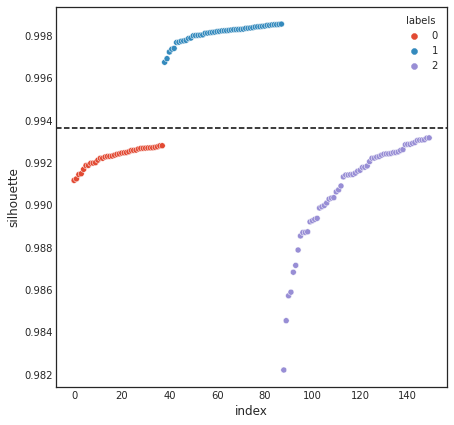

In [ ]:
# test your sihlouette function
X = pd.DataFrame(data["data"], columns=data["feature_names"])
X["labels"] = KMeans(3).fit_predict(X.values)
X["silhouette"] = compute_silhouette(X.values, labels)

df = (
    X.sort_values(["labels", "silhouette"])
    .reset_index(drop=True)
    .reset_index()
    .astype({"labels": "category"})
)

sns.scatterplot(x="index", y="silhouette", hue="labels", data=df)
plt.axhline(np.mean(df["silhouette"]), linestyle="dashed", color="black")
plt.show()

# FINAL EXERCISE
The Genotype-Tissue Expression (<a href='https://www.gtexportal.org'>GTEx</a>) project is a public resource to study tissue-specific gene expression and regulation. Samples were collected from 54 non-diseased tissue sites across nearly 1000 individuals. The dataset below contains the median RNA-seq gene expression for each of these 54 tissues. **With the unsupervised techniques above, investigate the dataset to find trends across tissues ang genes.**

In [ ]:
gtex = pd.read_csv(
    "https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz",
    sep="\t",
    skiprows=2,
    index_col=0,
)

In [ ]:
gtex

,Description,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra,Breast - Mammary Tissue,Cells - Cultured fibroblasts,Cells - EBV-transformed lymphocytes,Cervix - Ectocervix,Cervix - Endocervix,Colon - Sigmoid,Colon - Transverse,Esophagus - Gastroesophageal Junction,Esophagus - Mucosa,Esophagus - Muscularis,Fallopian Tube,Heart - Atrial Appendage,Heart - Left Ventricle,Kidney - Cortex,Kidney - Medulla,Liver,Lung,Minor Salivary Gland,Muscle - Skeletal,Nerve - Tibial,Ovary,Pancreas,Pituitary,Prostate,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,DDX11L1,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.166403,0.000000,0.000000,0.000000,0.00000
ENSG00000227232.5,WASH7P,4.064030,3.371110,2.68549,4.04762,3.90076,3.639630,5.16375,1.43859,1.69285,1.566050,4.99231,5.72099,2.483170,2.146670,1.68599,1.748110,1.538990,1.441670,2.73049,1.741940,4.438760,1.678600,2.49477,5.629350,7.097490,4.647770,3.595090,4.326410,3.117490,4.103350,6.134090,1.52031,0.924962,2.770810,2.21451,1.765410,4.508410,3.527670,1.41667,6.685310,6.634100,1.808710,5.425460,7.08318,5.932980,6.13265,4.193780,5.926310,3.062480,4.702530,6.272550,7.190010,5.745540,2.64743
ENSG00000278267.1,MIR6859-1,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
ENSG00000243485.5,MIR1302-2HG,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.024264,0.00000,0.00000,0.027366,0.030382,0.00000,0.024714,0.030669,0.023474,0.00000,0.019526,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.017893,0.017665,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.054223,0.000000,0.000000,0.000000,0.00000
ENSG00000237613.2,FAM138A,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,MT-ND6,3517.220000,3598.090000,6637.79000,6374.49000,4972.73000,4635.000000,8275.20000,9631.77000,8319.14000,11516.600000,4967.36

## REFERENCES
- _Unsupervised Learning and Data Clustering_. Sanatan Mishra. https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a
- _Clustering with Scikit with GIFs_. David Sheehan. https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
- _Calculate Similarity — the most relevant Metrics in a Nutshell_. Marvin Lüthe. https://towardsdatascience.com/calculate-similarity-the-most-relevant-metrics-in-a-nutshell-9a43564f533e
- *How to Determine the Optimal K for K-Means?*. Khyati Mahendru.
https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
- *K-means clustering*. Sherry Towers.
http://sherrytowers.com/2013/10/24/k-means-clustering/